In [1]:
from langgraph.graph import StateGraph, START,END
from typing import TypedDict,Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import MemorySaver


/Users/priya/LangChain/langchainvenv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [2]:
from langgraph.graph import add_messages
class ChatState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]

In [3]:
llm=ChatOpenAI()

In [4]:
def ChatNode(state:ChatState):
    #extract user query from state
    messages=state['messages']

    # send to llm
    response=llm.invoke(messages)

    # store the response back in state
    return {'messages': [response]}

In [5]:
checkpoint=MemorySaver()
graph=StateGraph(ChatState)

# add nodes
graph.add_node('Chat_Node', ChatNode)

# add edges
graph.add_edge(START,'Chat_Node')
graph.add_edge('Chat_Node',END)

# run the graph 
chat_bot=graph.compile(checkpointer=checkpoint)

# run the graph


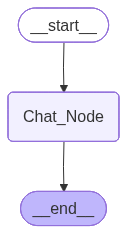

In [6]:
chat_bot

In [ ]:
while True:
    user_input=input('type here: ')
    print('User: ',user_input)

    if user_input.strip().lower() in['exit','quit','bye']:
        break
    response=chat_bot.invoke({'messages':[HumanMessage(content=user_input)]})
    print("AI: ",response['messages'][-1].content)

User:  hi i'm priya
AI:  Hello Priya! How can I assist you today?
User:  what is my name
AI:  I'm sorry, I do not know your name. Could you please tell me?
User:  what is capital of india
AI:  The capital of India is New Delhi.
User:  bye


In [7]:
# let's insert RAM into this chatbot
thread_id='1'
while True:
    user_input=input('type here: ')
    print('User: ',user_input)

    if user_input.strip().lower() in['exit','quit','bye']:
        break
    config={'configurable': {'thread_id':thread_id}}
    response=chat_bot.invoke({'messages':[HumanMessage(content=user_input)]},config=config)
    print("AI: ",response['messages'][-1].content)

User:  what is 10+9
AI:  10 + 9 equals 19.
User:  add 10 to the result
AI:  Adding 10 to the result of 10 + 9, which is 19, we get 19 + 10 = 29.
User:  what is my name
AI:  Your name is Priya.
User:  quit
